In [122]:
import geopandas as gpd
from shapely import Polygon, MultiPolygon, Point

In [2]:
file_path = "../../extract/output/arcgis_feature_query.geojson"

In [3]:
gdf = gpd.read_file(file_path)

gdf.head()

,OBJECTID,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
0,578,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.141053,2.425833e-06,"POLYGON ((96.84078 4.62257, 96.84078 4.62257, ..."
1,579,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.008459,1.515184e-07,"POLYGON ((96.84039 4.61826, 96.84032 4.61837, ..."
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"MULTIPOLYGON (((96.84279 4.61965, 96.84278 4.6..."
3,581,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.038819,5.724688e-07,"POLYGON ((96.84294 4.62263, 96.84288 4.62263, ..."
4,582,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.011531,1.120660e-07,"MULTIPOLYGON (((96.84613 4.61912, 96.8461 4.61..."


In [4]:
gdf.geometry.head()

0    POLYGON ((96.84078 4.62257, 96.84078 4.62257, ...
1    POLYGON ((96.84039 4.61826, 96.84032 4.61837, ...
2    MULTIPOLYGON (((96.84279 4.61965, 96.84278 4.6...
3    POLYGON ((96.84294 4.62263, 96.84288 4.62263, ...
4    MULTIPOLYGON (((96.84613 4.61912, 96.8461 4.61...
Name: geometry, dtype: geometry

## Set as multipolygon

In [5]:
gdf_multipoly = gdf.copy()

In [6]:
gdf_multipoly = gdf_multipoly.geometry.apply(
    lambda geom: MultiPolygon([geom]) if isinstance(geom, Polygon) else geom
)

In [7]:
len(gdf)

577

In [8]:
len(gdf_multipoly)

577

In [9]:
gdf.geometry.geom_type.value_counts()

MultiPolygon    297
Polygon         280
Name: count, dtype: int64

In [10]:
gdf_multipoly.geometry.geom_type.value_counts()

MultiPolygon    577
Name: count, dtype: int64

## Set as polygon

### MultiPolygon become separated entities

In [11]:
gdf_poly = gdf.copy()

In [12]:
gdf_poly = gdf_poly.explode("geometry", index_parts=False)

gdf_poly.head()

,OBJECTID,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
0,578,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.141053,2.425833e-06,"POLYGON ((96.84078 4.62257, 96.84078 4.62257, ..."
1,579,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.008459,1.515184e-07,"POLYGON ((96.84039 4.61826, 96.84032 4.61837, ..."
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"POLYGON ((96.84279 4.61965, 96.84278 4.61965, ..."
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"POLYGON ((96.84539 4.61918, 96.84536 4.61918, ..."
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"POLYGON ((96.84613 4.61912, 96.84607 4.61914, ..."


In [13]:
gdf_poly = gdf_poly.reset_index()

gdf_poly.head()

,index,OBJECTID,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
0,0,578,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.141053,2.425833e-06,"POLYGON ((96.84078 4.62257, 96.84078 4.62257, ..."
1,1,579,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.008459,1.515184e-07,"POLYGON ((96.84039 4.61826, 96.84032 4.61837, ..."
2,2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"POLYGON ((96.84279 4.61965, 96.84278 4.61965, ..."
3,2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"POLYGON ((96.84539 4.61918, 96.84536 4.61918, ..."
4,2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,"POLYGON ((96.84613 4.61912, 96.84607 4.61914, ..."


In [14]:
len(gdf)

577

In [15]:
len(gdf_poly)

1785

In [16]:
gdf.geometry.geom_type.value_counts()

MultiPolygon    297
Polygon         280
Name: count, dtype: int64

In [17]:
gdf_poly.geometry.geom_type.value_counts()

Polygon    1785
Name: count, dtype: int64

### MultiPolygon only extract largest area

In [18]:
gdf_poly2 = gdf.copy()

In [19]:
def to_polygon_max_area(geom):
  if isinstance(geom, Polygon):
    return geom
  elif isinstance(geom, MultiPolygon):
    return max(geom.geoms, key=lambda p: p.area)
  else:
    return None

gdf_poly2.geometry =  gdf_poly2.geometry.apply(to_polygon_max_area)


In [20]:
len(gdf)

577

In [21]:
len(gdf_poly2)

577

In [22]:
gdf.geometry.geom_type.value_counts()

MultiPolygon    297
Polygon         280
Name: count, dtype: int64

In [23]:
gdf_poly2.geometry.geom_type.value_counts()

Polygon    577
Name: count, dtype: int64

In [24]:
gdf.geometry.area.sum()

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/2106666390.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.area.sum()


np.float64(0.0013296449500173409)

In [25]:
gdf.to_crs(3857).geometry.area.sum()

np.float64(16531053.16484934)

In [26]:
gdf_poly2.to_crs(3857).geometry.area.sum()

np.float64(9545502.491369925)

<Axes: >

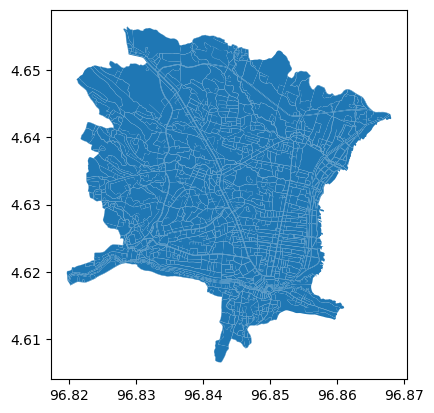

In [27]:
gdf.plot()

<Axes: >

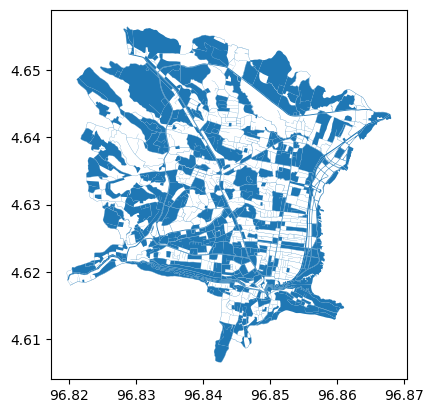

In [28]:
gdf_poly2.plot()

## Set as Point with centroid

In [33]:
gdf_point = gdf.copy()

In [35]:
gdf_point.geometry = gdf_point.geometry.centroid

gdf_point.head()

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/954821403.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_point.geometry = gdf_point.geometry.centroid


,OBJECTID,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
0,578,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.141053,2.425833e-06,POINT (96.83802 4.62161)
1,579,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.008459,1.515184e-07,POINT (96.83846 4.61891)
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,POINT (96.84568 4.61871)
3,581,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.038819,5.724688e-07,POINT (96.84404 4.62123)
4,582,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.011531,1.120660e-07,POINT (96.84574 4.61957)


<Axes: >

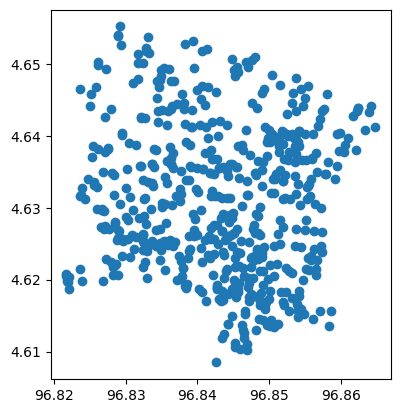

In [36]:
gdf_point.plot()

In [37]:
len(gdf_point)

577

## Set as Multipoint as Centroid

In [38]:
gdf_multipoint = gdf.copy()

In [41]:
gdf_multipoint = gdf_multipoint.explode(index_parts=False)

len(gdf_multipoint)

1785

In [51]:
gdf_multipoint.head()

,OBJECTID,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
0,578,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.141053,2.425833e-06,POINT (96.83802 4.62161)
1,579,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.008459,1.515184e-07,POINT (96.83846 4.61891)
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,POINT (96.84567 4.61867)
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,POINT (96.84565 4.61915)
2,580,Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07,POINT (96.84631 4.61909)


In [49]:
gdf_multipoint.geometry = gdf_multipoint.geometry.centroid

gdf_multipoint.geometry.head()

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/3952003779.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_multipoint.geometry = gdf_multipoint.geometry.centroid


0    POINT (96.83802 4.62161)
1    POINT (96.83846 4.61891)
2    POINT (96.84567 4.61867)
2    POINT (96.84565 4.61915)
2    POINT (96.84631 4.61909)
Name: geometry, dtype: geometry

In [54]:
gdf_multipoint = gdf_multipoint.dissolve(by="OBJECTID", aggfunc="first")

gdf_multipoint.head()

,geometry,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,...,RDBUMI,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area
OBJECTID,,,,,,,,,,,,,,,,,,,,,
578,POINT (96.83802 4.62161),Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.141053,2.425833e-06
579,POINT (96.83846 4.61891),Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,10,...,Tidak Ada,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.008459,1.515184e-07
580,"MULTIPOINT (96.84509 4.61906, 96.84565 4.61915...",Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.025818,3.163195e-07
581,POINT (96.84404 4.62123),Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.038819,5.724688e-07
582,"MULTIPOINT (96.84527 4.61916, 96.84534 4.61977...",Badan Jalan,Badan Jalan,BJ,Badan Jalan,BJ,Zona Budi Daya,I,A,11,...,Tidak Ada,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.011531,1.120660e-07


## Polygon Simplification

In [83]:
gdf.iloc[102:104]

,OBJECTID,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
102,680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,"MULTIPOLYGON (((96.84926 4.62284, 96.84847 4.6..."
103,681,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.003071,4.918930e-07,"POLYGON ((96.84926 4.62284, 96.84927 4.62287, ..."


<Axes: >

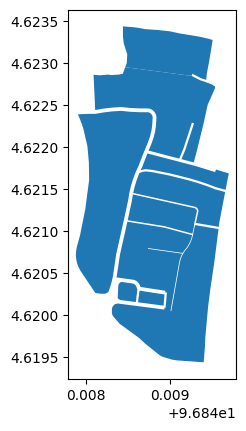

In [84]:
gdf.iloc[102:104].plot()

<Axes: >

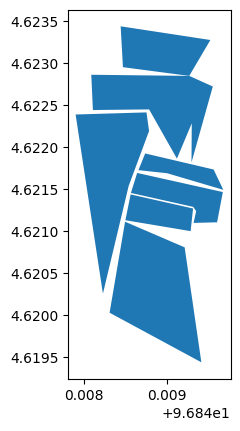

In [85]:
gdf.iloc[102:104].geometry.simplify(0.5).plot()

## Geometry Buffer

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/3302371734.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.iloc[102:104].geometry.buffer(0.0001).plot()


<Axes: >

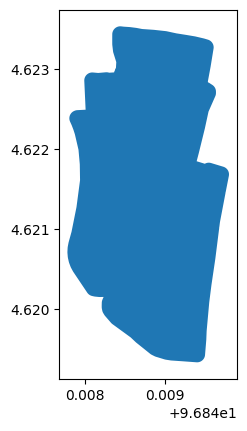

In [86]:
gdf.iloc[102:104].geometry.buffer(0.0001).plot()

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/885605347.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.iloc[102:104].geometry.centroid.buffer(0.0001).plot()
/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/885605347.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.iloc[102:104].geometry.centroid.buffer(0.0001).plot()


<Axes: >

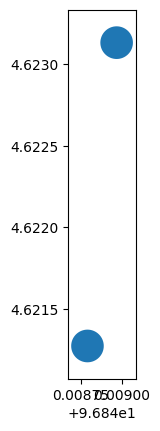

In [87]:
gdf.iloc[102:104].geometry.centroid.buffer(0.0001).plot()

In [90]:
gdf_multipoint.iloc[102:104].explode("geometry")

,NAMOBJ,NAMZON,KODZON,NAMSZN,KODSZN,JNSRPR,KODEWP,KODSWP,KODBLK,KODSBL,...,TPZ_00,REMARK,PP,BA,CT,BT,NOTHPR,SHAPE_Length,SHAPE_Area,geometry
OBJECTID,,,,,,,,,,,,,,,,,,,,,
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.84828 4.6215)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.8485 4.62027)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.84878 4.6202)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.84889 4.62249)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.84891 4.6212)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.849 4.62032)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.84916 4.62143)
680,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.029526,4.343623e-06,POINT (96.8492 4.62171)
681,Perdagangan dan Jasa Skala BWP,Zona Perdagangan dan Jasa,K,Perdagangan dan Jasa Skala BWP,K-2,Zona Budi Daya,I,A,2,Tidak Ada,...,Tidak Ada,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,Tidak Ada,http://gistaru.atrbpn.go.id/repository/Pages/V...,http://gistaru.atrbpn.go.id/repository/Pages/V...,Peraturan Bupati Aceh Tengah Nomor 47 Tahun 20...,0.003071,4.918930e-07,POINT (96.84897 4.62313)


/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/1777709344.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_multipoint.iloc[102:104].explode("geometry").centroid.buffer(0.0001).plot()
/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_84785/1777709344.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_multipoint.iloc[102:104].explode("geometry").centroid.buffer(0.0001).plot()


<Axes: >

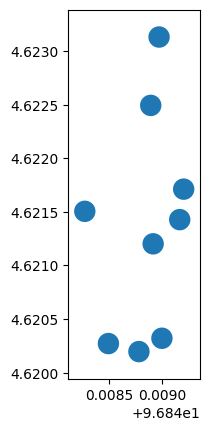

In [91]:
gdf_multipoint.iloc[102:104].explode("geometry").centroid.buffer(0.0001).plot()

### Partitioned Geometry

In [134]:
parts = gdf.iloc[102:104].geometry

parts

102    MULTIPOLYGON (((96.84926 4.62284, 96.84847 4.6...
103    POLYGON ((96.84926 4.62284, 96.84927 4.62287, ...
Name: geometry, dtype: geometry

<Axes: >

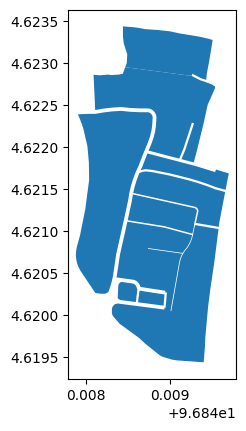

In [135]:
parts.plot()

In [136]:
def extract_vertices(geom):
  if isinstance(geom, Polygon):
    data = []
    for coord in geom.exterior.coords:
      data.append(Point(coord))
    return data
  elif isinstance(geom, MultiPolygon):
    data = []
    for poly in geom.geoms:
      for coord in poly.exterior.coords:
        data.append(Point(coord))
    return data
  else:
    return None

parts = parts.apply(extract_vertices)

parts

102    [POINT (96.84926212200008 4.622843517000035), ...
103    [POINT (96.84926212200008 4.622843517000035), ...
Name: geometry, dtype: object

In [137]:
parts = parts.explode()

parts

102    POINT (96.84926212200008 4.622843517000035)
102    POINT (96.84847047000005 4.622947206000049)
102    POINT (96.84844149100007 4.622868328000038)
102    POINT (96.84839384200006 4.622859214000073)
102    POINT (96.84829553000009 4.622852935000026)
                          ...                     
103    POINT (96.84845230900004 4.623233132000053)
103    POINT (96.84849443000007 4.623098713000047)
103    POINT (96.84848877800005 4.622997038000051)
103    POINT (96.84847047000005 4.622947206000049)
103    POINT (96.84926212200008 4.622843517000035)
Name: geometry, Length: 456, dtype: object

In [138]:
len(parts)

456

In [139]:
parts.plot()

TypeError: no numeric data to plot

In [153]:
gdf_parts = gpd.GeoDataFrame(geometry=parts, crs=4326)

In [154]:
gdf_parts

,geometry
102,POINT (96.84926 4.62284)
102,POINT (96.84847 4.62295)
102,POINT (96.84844 4.62287)
102,POINT (96.84839 4.62286)
102,POINT (96.8483 4.62285)
...,...
103,POINT (96.84845 4.62323)
103,POINT (96.84849 4.6231)
103,POINT (96.84849 4.623)
103,POINT (96.84847 4.62295)


<Axes: >

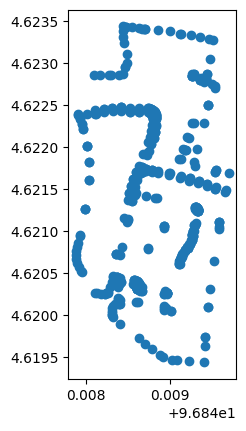

In [155]:
gdf_parts.plot()

## Export

In [148]:
gdf_poly.iloc[102:104].to_file("../output.gpkg", layer="rdtr_takengon")

In [156]:
gdf_parts.to_file("../output.gpkg", layer="rdtr_takengon_vertices")